# Session 10: Monte Carlo and Course Wrap-up

- Integration between limits in Python
- What is Monte Carlo?
- Monte Carlo Integration
- Monte Carlo Analysis of CO2 Storage Problem
- Summary: What you can do now
- Bringing the course tother: "How to solve Hugh's Math problems with Python"


In [1]:
%matplotlib inline

from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

---

# 1. Testing correlations: Breaking the sequence

One way to test whether a hypothesised correlation is real is to try and break it!

Let's consider the distance between successive events in the ISC earthquake catalogue.

## QUESTION: Are successive earthquakes closer to each other than random?

### 1.1 Load the data

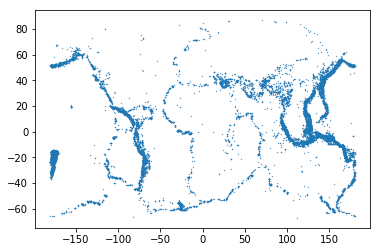

In [35]:
cat = pd.read_csv('isc-gem-cat.csv', sep=',', header=53)
cat.columns.tolist()
cat.columns = cat.columns.str.strip()

lat = np.array(cat['lat'])
lon = np.array(cat['lon'])

plt.scatter(lon, lat, s=0.1)

### 1.2 Create function to return the spherical distance.

In [3]:
def sphericalDistance (lat1, lon1, lat2, lon2):
    ''' calculate and return the spherical distance between
    a set of lats and longs'''
    
    R = 6371  # radius of the earth in km
    a = (lon2 - lon1) * np.cos( 0.5*(lat2+lat1)* np.pi / 180. )
    b = lat2 - lat1
    d = R * np.sqrt( a*a + b*b )
    return d

### 1.3 Let's plot a histogram of the distance between successive events.

In [4]:
lat1 = lat[:-1]
lat2 = lat[1:]
lon1 = lon[:-1]
lon2 = lon[1:]

distances = sphericalDistance (lat[:-1], lon[:-1], lat[1:], lon[1:])

plt.hist(distances, bins = 100)
plt.ylabel("Frequency")
plt.xlabel("Distance")

Text(0.5,0,'Distance')

### QUESTION: How can we test (break) the correlation?

### 1.4 Randomise the events in time and recalculate

In [ ]:
## Reorder the catalogue by shuffling the order of the events
n = np.arange( len(lat) )
np.random.shuffle(n)

In [5]:
## Reanalyse as before

rLon = lon[n] 
rLat = lat[n] 

rDistances = sphericalDistance (rLat[:-1], rLon[:-1], rLat[1:], rLon[1:])

plt.hist(rDistances, bins = 100)
plt.ylabel("Frequency")
plt.xlabel("Distance")

Text(0.5,0,'Distance')

### 1.5 Summary

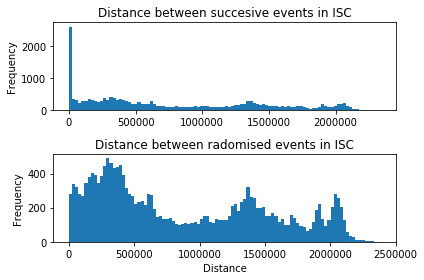

In [6]:
plt.subplot(2,1,1)
plt.hist(distances, bins=100)
plt.ylabel("Frequency")

plt.title("Distance between succesive events in ISC")

plt.subplot(2,1,2)
plt.hist(rDistances, bins=100)
plt.ylabel("Frequency")
plt.xlabel("Distance")
plt.title("Distance between radomised events in ISC")

plt.tight_layout()

---

# 2. Integration between limits using Quadrature (NOT MONTE-CARLO)

- Integration between limits: `quad()`
- Double integration between limits: `dblquad()`
- Tripple integration between limits: `tplquad()`


## 2.1 CONCEPTS

The quadrature family of methods work by adding estimated areas together. For example:

### Square Rule

Interpolation with polynomials evaluated at equally spaced points in $[a,b]$  yields the Newton–Cotes formulas, of which the rectangle rule and the trapezoidal rule are examples.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width = 30%>

### Trapezoid Rule

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width = 30%>

### Simpson's Rule

Simpson's rule, which is based on a polynomial of order 2, is also a Newton–Cotes formula.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Integration_simpson.svg/350px-Integration_simpson.svg.png" width = 30%>

Quadrature rules with equally spaced points have the very convenient property of nesting. The corresponding rule with each interval subdivided includes all the current points, so those integrand values can be re-used.

### Gaussian Quadrature

If we allow the intervals between interpolation points to vary, we find another group of quadrature formulas, such as the Gaussian quadrature formulas. A Gaussian quadrature rule is typically more accurate than a Newton–Cotes rule, which requires the same number of function evaluations, if the integrand is smooth (i.e., if it is sufficiently differentiable). Gaussian Quadrature rules do not nest.



Gaussian quadrature as above will only produce good results if the function f(x) is well approximated by a polynomial function within the range [−1, 1]. The method is not, for example, suitable for functions with singularities.

<img src="http://images.slideplayer.com/22/6418717/slides/slide_10.jpg" width = 30%>

## 2.2 EXAMPLES: Definite Integrals: Integrating between limits

### 2.2a Single Integrals

**EXAMPLE 1**: Evaluate,
$$\int^4_0 x^2 dx$$

In [7]:
# Define the function
x2 = lambda x: x**2

# Use quad(func, a=lowerLimit, b=upperLimit)
# quad returns the value of the integration and an estimate of the absolute error 
ans, err = integrate.quad(x2, 0, 4)

print("Answer = ",ans)
print("Error = ", err)

print("Analytic result: ", 4**3 / 3.)

Answer =  21.333333333333336
Error =  2.368475785867001e-13
Analytic result:  21.333333333333332


**EXAMPLE **2: Evaluate,
$$\int^{\infty}_0 e^{-x} dx$$

We can also express integrals to infinity using `np.inf`

In [8]:
# Define the function
invexp = lambda x: np.exp(-x)

# Perform the integral
ans, err = integrate.quad(invexp, 0, np.inf)

print(ans)

1.0000000000000002


### 2.2b Double Integrals

**EXAMPLE 3**: 

Integrate, $$f(x,y) = y \sin(x) + x \cos(y)$$

Over,
$$\pi \leq x \leq 2 \pi$$
$$0 \leq y \leq \pi$$

i.e.

$$ \int _{x=\pi}^{2\pi} \int _{y=0}^{\pi} y \sin(x) + x \cos(y)$$

- We specify the x-limits as numerical values.
- The function is designed so that we *have to provide callable functions* for the range of the $y$-variable. Here they are constants, so we create lambda functions that return the constants.

In [9]:
from scipy.integrate import dblquad
import numpy as np

def integrand(y, x):
    'y must be the first argument, and x the second.'
    return y * np.sin(x) + x * np.cos(y)

ans, err = integrate.dblquad(integrand, np.pi, 2*np.pi, lambda x: 0, lambda x: np.pi)
print(ans)

-9.869604401089358


**EXAMPLE 3**: 

Evaluate,
 $$ area = \int _{x=0}^{1/2} \int _{y=0}^{1-2x} xy \, dx \, dy $$
 
(analytic answer = 1/96)

In [10]:
ans, err = integrate.dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)

print(ans)

print("Analytic answer = ", 1/96.)

0.010416666666666668
Analytic answer =  0.010416666666666666


### 2.2c Tripple Integrals

**EXAMPLE 4:**

Evaluate,

$$ \int _{x=0}^{\pi} \int _{y=0}^{1} \int _{z=-1}^{1} y \sin(x) + z \cos(y)$$

In [11]:
def integrand(z, y, x):
    return y * np.sin(x) + z * np.cos(x)

ans, err = integrate.tplquad(integrand,
                   0, np.pi,  # x limits
                   lambda x: 0,
                   lambda x: 1, # y limits
                   lambda x,y: -1,
                   lambda x,y: 1) # z limits

print(ans)

1.9999999999999998


## 2.3 EXERCISES: Solve the following

Use quad to solve,
$$\int^{10}_1 x^4 dx$$

Use `quad` to show that $$\int^{5}_1 -0.25x^2+x+4 dx = 17.666$$

Compute the integral,
$$\int^{2}_0 \frac{1}{x^3-2x-5} dx$$

[ $ans=-0.4605$ ]

Find, $$\int_0^{10} \int_1^{10} \exp(-x^2-y^2) dx dy$$



Find, $$\int_0^\infty \int_1^\infty \frac{e^{-xt}}{t^n} dt dx$$

for the case $n=4$

---

# 3. Monte Carlo Integration

So far, we have considered deterministic methods for solving differential equations - many geophysical and meterological problems fall into this domain.

In this final session, we will explore a different computatonal approach which is generlly refered to as Monte Carlo methods - named after the principality famous for it's casinos and gambling. 

As the name suggests - these methods involve the use of samples of random numbers to obtain useful results.

This Session is a brief introduction to some computational methods that use random numbers.

Reasons why you might want to use such methods include:

- To *propagate uncertainties* in prior imput parameters propagate through to understand the uncertainty on the posterior distribution of some other parameter
- To *numerically integrate* a complicated function
- To *bootstrap* confidence intervals
- To generate a *synthetic sample* where you know all the parameters going into it so that you can test how well different geophysical and/or inversion methods work

The popularity of these methods has grown because they can take advantage of the power of modern computers and are an easy way to explore complicated error structures.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/MonteCarloIntegrationCircle.svg/480px-MonteCarloIntegrationCircle.svg.png" width = "30%" >

---

## 3.1 Monte Carlo Integration



Evaluate: $$\int_{x=0}^1 e^x dx$$

The basic idea of Monte Carlo integration is very simple and only requires elemenatry statistics. Suppose we want to find the value of

$\int_a^b f(x) dx$ in some region with volumne $V$. Monte Carlo integration estimates this integral by estimaing the fraction of random points that fall below $f(x)$ multiplied by $V$.

- The convergence of Monte Carlo integration is $0(n^{1/2})$
 and independent of the dimensionality. 
 
- Hence Monte Carlo integration generally beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $0(n^d)$. 
 
- Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

Let's first use `quad` so we know the answer.

In [14]:
from scipy import integrate
integrate.quad( np.exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

Now, let's look at the problem from a Monte Carlo perspective.

In [15]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));

pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1], label="$y=\exp(x)$")

plt.xlim([0,1])
plt.ylim([0, np.e]);
plt.xlabel('x')
plt.xlabel('y')
plt.legend()

If we can accurately estimate the fraction of points that lie above the line we want to integrate AND multiply it by the volume, we have the solution!

In [16]:
# Do the monte carlo sampling

# Choose some number of points to evaluate
n = 10**2

# Sample 2*n points within the domain
pts = np.random.uniform(0, 1, (n, 2))

# Scale the trial points so that they cover the y-domain
pts[:, 1] *= np.e

# Calculate number of trail points that low below the function
count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))

# Calculate the volume of region (Delta_y * Delta_x)
volume = np.e * 1 

# What proportion of the volume lies below the line
sol = (volume * count)/n

print ( '%10d %.6f' % (n, sol) )

       100 1.875614


Let's now vary the sample size $n$ and see how the accuracy varies

In [17]:
# Monte Carlo approximation

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))
    plt.scatter(np.log10(n),sol)

ans = integrate.quad( np.exp, 0, 1)

plt.axhline(y=ans[0])
plt.xlabel("log10(sampleSize)")
plt.ylabel("Estimate of integral")

        10 1.902797
       100 1.848432
      1000 1.707081
     10000 1.728284
    100000 1.729153
   1000000 1.716223
  10000000 1.717674
 100000000 1.718360


Text(0,0.5,'Estimate of integral')

---

## 3.2 Montioring variance

We are often interested in knowning how many iterations it takes for Monte Carlo integration to “converge”. To do this, we would like some estimate of the variance, and it is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of interations is simply to do many such simulations.

For the example, we willl try to etsimate the function

$$f(x)= x \cos(7x)+ \sin(13x)$$  $$0≤x≤1$$

In [18]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [19]:
x = np.linspace(0, 1, 100)
plt.plot(x, f(x));

### 3.2a Using multiple independent samples

In [20]:
n = 100
reps = 1000

In [21]:
x = f(np.random.random((n, reps)))

y = np.cumsum(x, axis=0) / np.arange(1, n+1)[:, None]

upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

In [22]:
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

### 3.2b Using bootstrap (Single dataset that is resampled with replacement)

In [23]:
xb = np.random.choice(x[:,0], (n, reps), replace=True)
yb = np.cumsum(xb, axis=0) / np.arange(1, n+1)[:, None]
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

In [24]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

---

# 4. Application: Uncertainty in CO2 density for geological storage of CO2

The phase of CO2 in the subsurface is dependent upon the pressure and temperature of the reservoir. 

In this exercise, I want you to explore the consequences of uncertainty in pressure and temperature on the phase of CO2 in the Sleipner field at the injection depth and at the caprock.

A full equation of state is complicated and non-trivial to integrate over a range of pressures and temperatures using `quad`.

Instead, this problem can be thought of in terms of Monte Carlo integration.

$$E[\rho_{CO_2}] = \int \int_{T,P} \rho_{CO_2}(P,T) \, f(P,T) dP dT = \frac{1}{n} \sum_{i=1}^n \rho_{CO_2}(P_i,T_i) $$

So we can simply integrate this function by sampling many pressures and temperatures from the distributions which describe our uncertainty.


In [25]:
# First let's load my library of useful CO2 functions

import CO2Density as CO2lib

### Calculate a CO2 density

Calculates the density of CO2 at some given pressure and temperature.

- Pressures should be given in MPa. For reference, the hydrostatic pressure gradient is 10 MPa/km.
- The water depth in the North Sea is typically 100m
- Temperatures increase with the geothermal gradient which typically range from 25-38 degC/km.
- Sea bed temperatures in the North Sea are typically 7degC.

So, at 1km below seabed hydrostatic pressure would be:

$P(z=1km) = 10 * (1. + 0.1) = 11 $ MPa

The temperature would typically be:

$T(z=1km) = 7 + 30 * 1 = 37$ degC $= 310$K

We can find the corresponding density using my code:

In [26]:
P = 11.
T = 310.

rho = CO2lib.CO2_getDensityFromPT(P, T)

print(rho,"[kg/m^3]" )

725.0215370511421 [kg/m^3]


/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:147: RuntimeWarning: invalid value encountered in power
  satVapDensity =  Rho_c * np.exp( np.sum( aV*(1-T/T_c)**tV ) )         #density
/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:128: RuntimeWarning: invalid value encountered in power
  satLiqDensity =  Rho_c * np.exp( np.sum(aL*(1-T/T_c)**tL ) )         #density


### Plotting the Vapour Pressure phase diagram

<img src="http://chemwiki.ucdavis.edu/@api/deki/files/61004/=9a913b76b159d16b99cde693e40331f8.jpg?revision=1", width=400>



/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:158: RuntimeWarning: invalid value encountered in power
  return (44.01 * Rho_c * np.exp( np.sum( aV * (1-Temp/T_c)**tV ) ) - density)**2


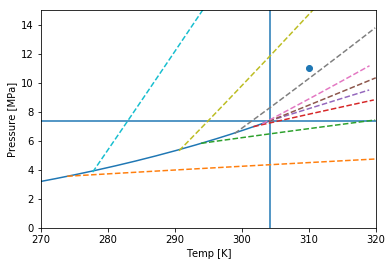

In [27]:
CO2lib.CO2_plotVapPressureCurve()
plt.scatter(T, P)

### Plotting the Pressure-Density phase diagram


In [28]:
CO2lib.plotSaturatedDensityCurves()
plt.scatter(rho, P)

### Uncertainty in CO2 density at the injection point

#### Pressure Model

Assume 90m water depth and that the average subsurface pressure is hydrostatic.

Hydrostatic pressure increases at 10 MPa/km

#### Temperature

Assume that the seabed temperature is 7 degC.

There are two proposed models for the geothermal gradient at Sleipner.

The hot model suggests that: $\frac{dT_{hot}}{dz} = 36$ degC/km

The cool model suggests that:  $\frac{dT_{cool}}{dz} = 28$ degC/km

#### Depths

The Sleipner injection point is at 900m below seabed.

The Sleipner caprock is at 710m below seabed.

**EXERCISE: Plot the density profiles** 

Modify the code below to plot the density profiles and phase diagrams running from the seabed to 1.2km deep.

In [ ]:
CO2lib.CO2_plotVapPressureCurve()

depthBelowSeabed = np.arange( ... , ... , ... ) 
waterDepth = ...

pressureProfile_MPa = ( ... + ... ) * ... 

temperatureProfile1_K = ... + 28*... + 273.15
temperatureProfile2_K = ... + 36*... + 273.15

plt.plot(temperatureProfile1_K, pressureProfile_MPa, linewidth=2, color='black', label='Cool model')
plt.plot(temperatureProfile2_K, pressureProfile_MPa, linewidth=2, color='red', label='Hot model')
plt.title("Vapour pressure curve (P-T Phase Diagram)")
plt.legend()

In [38]:
densityProfile1 = np.empty_like(pressureProfile_MPa)
densityProfile2 = np.empty_like(pressureProfile_MPa)

for i in range( len(densityProfile2) ):
    densityProfile1[i] = CO2lib.CO2_getDensityFromPT(pressureProfile_MPa[i], temperatureProfile1_K[i])
    densityProfile2[i] = CO2lib.CO2_getDensityFromPT(pressureProfile_MPa[i], temperatureProfile2_K[i])

CO2lib.plotSaturatedDensityCurves()
plt.plot(densityProfile1, pressureProfile_MPa, linewidth=2, color='black', label='Cool model')
plt.plot(densityProfile2, pressureProfile_MPa, linewidth=2, color='red', label='Hot model')
plt.legend()
plt.title("Pressure-Density Phase Diagram")

/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:147: RuntimeWarning: invalid value encountered in power
  satVapDensity =  Rho_c * np.exp( np.sum( aV*(1-T/T_c)**tV ) )         #density
/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:128: RuntimeWarning: invalid value encountered in power
  satLiqDensity =  Rho_c * np.exp( np.sum(aL*(1-T/T_c)**tL ) )         #density


Text(0.5,1,'Pressure-Density Phase Diagram')

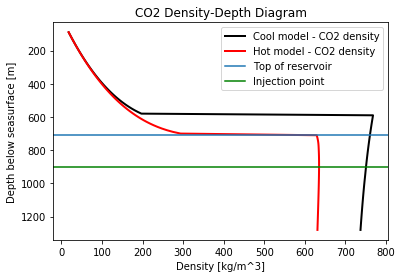

In [43]:
z = depthBelowSeabed + 90.

plt.plot(densityProfile1, z, linewidth=2, color='black', label='Cool model - CO2 density')
plt.plot(densityProfile2, z, linewidth=2, color='red', label='Hot model - CO2 density')
plt.gca().invert_yaxis()
plt.xlabel("Density [kg/m^3]")
plt.ylabel("Depth below seasurface [m]")
plt.title("CO2 Density-Depth Diagram")

plt.axhline(y=710, label="Top of reservoir")
plt.axhline(y=900, label="Injection point", color='g')
plt.legend()

#### What is the impact of uncertainty on these estimates of density?

Below is some code to generate uncertainties on the pressure and temperature.

It takes a mean pressure and a standard deviation.

Have a look at the histograms to understand what this is doing.

/Users/mnaylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/Users/mnaylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


Text(0.5,0,'Pressure [MPa]')

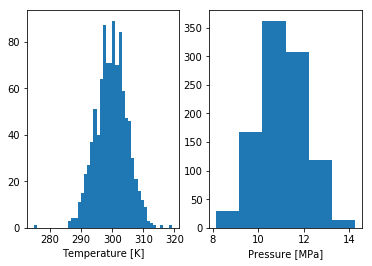

In [32]:
# Creat a set of random pressures and temperatures.

N=1000

pressures = np.random.normal(11.,1., N)
temperatures = np.random.normal(300.,5., N)

plt.figure('priors')

plt.subplot(1,2,1)

binwidth=1.
n = (max(temperatures)-min(temperatures))/binwidth; Nplus1 = n + 1
binList = np.linspace(min(temperatures), max(temperatures), Nplus1)

plt.hist(temperatures, binList)
plt.xlabel('Temperature [K]')

plt.subplot(1,2,2)
binwidth=1.
n = (max(pressures)-min(pressures))/binwidth; Nplus1 = n + 1
binList = np.linspace(min(pressures), max(pressures), Nplus1)

plt.hist(pressures, binList)
plt.xlabel('Pressure [MPa]')

Now we can calculate and plot all the resulting densities on the phase diagrams.

/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:158: RuntimeWarning: invalid value encountered in power
  return (44.01 * Rho_c * np.exp( np.sum( aV * (1-Temp/T_c)**tV ) ) - density)**2
/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:147: RuntimeWarning: invalid value encountered in power
  satVapDensity =  Rho_c * np.exp( np.sum( aV*(1-T/T_c)**tV ) )         #density
/Users/mnaylor/GitLab/MathAndCompMethodsGroup-2018/session-10_montecarlomethods_solutions/CO2Density.py:128: RuntimeWarning: invalid value encountered in power
  satLiqDensity =  Rho_c * np.exp( np.sum(aL*(1-T/T_c)**tL ) )         #density


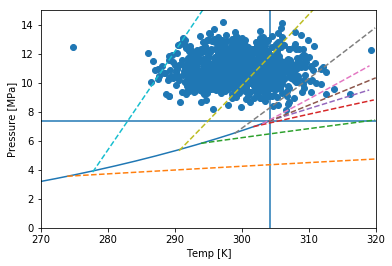

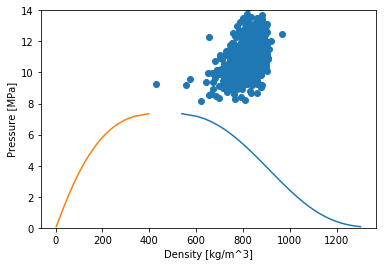

In [33]:
CO2lib.CO2_plotVapPressureCurve()

plt.scatter(temperatures, pressures)

densities = np.zeros(N)
for i in range(N):
    densities[i] = CO2lib.CO2_getDensityFromPT(pressures[i], temperatures[i])

CO2lib.plotSaturatedDensityCurves()
plt.scatter(densities, pressures)

And we can plot a histogram of all the densities.

/Users/mnaylor/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


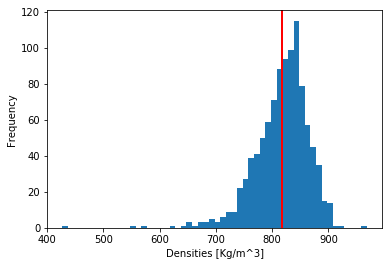

In [34]:
plt.figure('posteriors')

binwidth=10.

n = (max(densities)-min(densities))/binwidth; 
Nplus1 = n + 1

binList = np.linspace(min(densities), max(densities), Nplus1)

plt.hist( densities[np.isfinite(densities)], binList, )
plt.xlabel('Densities [Kg/m^3]')
plt.ylabel('Frequency')

plt.axvline(x=np.average(densities[np.isfinite(densities)]), color='red', linewidth=2)

**EXERCISE:** 

Copy and modify the code above 4 times to create histograms of the density at the injection point and caprock for both the hot and cold models. Assume that our uncertainty on the temperature is 5 degC at 1 standard deviation and the uncertainty on P is 1MPa at 1 standard deviation.

**QUESTION:** 

- Is there more uncertainty in density at the injection point or the caprock?
- Explain the sources of this uncertainty.
- The expectation value for the density is the sum of all these densities divided by the sample size.
- Is this a helpful metric?

---

# 5. Linking the Math and Comp methods

---

## Math Notes: Secion 5.3 "Steady-state thermal conduction: the one-dimensional solution for plane geometry"

The heatflow equation in 1D is given by
$$k\frac{d^2T}{dz^2} + \rho H= 0$$

Solve this using the BCs:

- $T=T_s$ at $z=0$
- $q=-q_s$ at $z=0$

**QUESTION 1** Is this an Initial Value or Boundary Value problem?

**QUESTION 2** How can we use `odeint` to solve this?

**ANSWER** Coupled 1st order ODEs


- Let's work with the parameters given in exercise 6.1:

"Assume that heat is transported in the oceanic lithosphere by conduction, and that it can be treated as a half-space with uniform density ($\rho = 3300$ kg m$^{−3}$), thermal conductivity ($k = 4 $ W m$^{−1}$K$^{−1}$) and heat production ($H = 6 × 10^{−12}$ W kg$^{−1}$). If the surface temperature is $0^◦$C and the heat flow is $70$ mW m$^{−2}$, estimate the temperature at the base of the lithosphere ( $z = 70$ km )."

- Let $y =  \frac{dT}{dz}$ so that we can express the second order ODE in $T$ as a first order ODE in $y$.
 
Therefore,  $y' =  \frac{d^2T}{dz^2} = -\frac{\rho H}{\kappa}$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

T_s = 0.
#q_s =0
q_s =-70.e-3

kappa = 4.
H = 6.e-12
rho = 3300

def dy_dz(Y, z):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [Y[1], -rho*H/kappa]

Y0 = [T_s, -q_s]
zs = np.linspace(0, 70.e3, 200)
Us = integrate.odeint(dy_dz, Y0, zs)
Ts = Us[:,0]

plt.plot(Ts,-zs/1.e3)
plt.xlabel("Temperature [degC]")
plt.ylabel("Depth [km]")
plt.title("Temperature profile");

---

## Math Notes: Secion 6.0.3 "Models of steady heat flow: The exponential model"

Poisson's Equation for heat flow with exponential heat production with depth is:

$$k\frac{d^2T}{dz^2} + \rho_s H_s \exp(-z/Z)= 0$$

Solve this using the BCs:

- $T=T_s$ at $z=0$
- $q=q_m$ at $z=\infty$

**QUESTION 1** Is this an Initial Value or Boundary Value problem?

**QUESTION 2** How can we use `odeint` to solve this?




## MathNotes: Section 8 Penetration of heat into the Earth’s crust

$$\kappa \frac{\partial^2T}{\partial z^2} - \frac{\partial T}{\partial z}= 0$$

- $T(z=0)=\Delta T \cos (\omega t)$ at $z=0$

$$\kappa \frac{-T^n_{i-1}+2T^n_i-T^n_{i+1}}{\Delta z^2} - \frac{T^{n+1}_{i}-T^n_i}{2 \Delta t} =0$$

$$T^{n+1}_{i} = \frac{2 \kappa \Delta t}{\Delta z^2}  ( -T^n_{i-1}+2T^n_i-T^n_{i+1}) + T^n_i$$

## Solve the 1D heat flow equation with known temperatures at the top and bottom using Banded Matrices

The heatflow equation in 1D is given by
$$\frac{d^2T}{dy^2} =-\frac{\rho H}{k}$$

The LHS can be discretised as follows:

$$\frac{d^2T}{dy^2} \cong \frac{1}{\Delta y} \lbrace{ \frac{T(y_{i+1}) - T(y_{i})}{\Delta y} - \frac{T(y_{i}) - T(y_{i-1})}{\Delta y} \rbrace} = \frac{-T_{i-1}+2T_i-T_{i+1}}{\Delta y^2}$$

Therefore the original equation can be written, 
$$-T_{i-1}+2T_i-T_{i+1} \cong  \frac{\rho H}{k}(\Delta y)^2  $$

This we can write in the form of a banded matrix such that:

$$\mathbf{MT}=\mathbf{f}$$

Where:
- $\mathbf{M}$ is the NxN matrix that describes the second order deivative
- $\mathbf{T}$ is an Nx1 vector of temperatures that we are solving for
- $\mathbf{f}$ is an Nx1 vector of physical constants and wraps in the boundary conditions

### Boundary value: Known temperature top and bottom

#### Working through a small example

$T_s=0$

$T(y=100)=1200$

$\Delta y = 20$ 

$y=0,100$ 

$\frac{\rho H}{k}(\Delta y)^2 =50$ K

Therefore,

$50 = -T_0+2T_1-T_2$

$50 = -T_1+2T_2-T_3$

$50 = -T_2+2T_3-T_4$

$50 = -T_3+2T_4-T_5$

---
Since $T_0=273$ and $T_5=273+1200=1473$ are known, these reduces to:

$323 = 2T_1-T_2$

$50 = -T_1+2T_2-T_3$

$50 = -T_2+2T_3-T_4$

$1523 = -T_3+2T_4$

---
These are simulatneous equations, which we know how to solve from linear algrbra:


$$
\left(
\begin{array}{c}
50 + 273\\
50\\
50\\
50 + 273 + 1200\\
\end{array}
\right)=\left(
\begin{array}{c}
323\\
50\\
50\\
1523\\
\end{array}
\right)=\left(
  \begin{array}{cc}
     2 & -1 & 0 & 0 \\
     -1 & 2 & -1 & 0 \\
     0 & -1 & 2 & -1 \\
     0 & 0 & -1 & 2 \\
   \end{array}\right)
  \left(
\begin{array}{c}
T_1\\
T_2\\
T_3\\
T_4\\
\end{array}
\right)
$$

In [ ]:
import numpy as np

a = np.array([323., 50.,50.,1523.])
C = np.array([[2.,-1.,0.,0.],[-1.,2.,-1.,0.],[0.,-1.,2.,-1.],[0.,0.,-1.,2.]])



Use the `numpy` `linalg.solve` function to solve $\mathbf{My}=\mathbf{x}$

In [ ]:
T = np.linalg.solve(C,a)
print(T)

#### Now generalise to arbitary number of points

In [ ]:
%matplotlib inline

from scipy import sparse
from matplotlib import pyplot as plt
import scipy.sparse.linalg as linalg   # linear algebra for sparse systems

# Choose the number of interior points
N = 10
dy = 100. / (N+1)

# Define some model parameters
heatGeneration = 0.5 # \micro W m^-3 
k = 4 # W m^-1 K^-1

# Set an array for depths which is the length of the 
# number of interior points plus to boundary nodes
z = np.linspace(0,100.,N+2)

# Specify the RHS constant
f = heatGeneration / k * dy**2
B = np.ones(N)*f

# Wrap the upper and lower BCs into the RHS
B[0] += 273.
B[-1] += 1200. + 273.

# Define the second order ODE matrix for diffusive heatflow using sparse matrices
C = 2*sparse.eye(N, k=0) - 1 * sparse.eye(N, k=1) - 1 * sparse.eye(N, k=-1)

# Solve the martix equation using the sparse solver
T = linalg.spsolve(C,B)

# Append the BCs
T = np.append(273., T)
T = np.append(T , 1200. + 273.)

#### Let's check the matrix looks ok

In [ ]:
plt.matshow( C.todense() )
plt.colorbar()

#### Plot the resulting temperature profile

In [ ]:
plt.plot(T, -z)
plt.ylabel("Depth [m]")
plt.xlabel("Temperature [K]")

#### On a single plot explore the following scenarios:

- **Conductivity:** Reduce the conductivity of the whole column to 1.7 Wm^-1 degC^-1
- **Conductivity:** Increase the conductivity of the whole column to 3.4 Wm^-1 degC^-1
- **Heat Generation:** Increase the heat generation from 1.25 to 2.5 
- **Heat Generation:** Reduce the heat generation from 1.25 to 0.4

Explore the consequence of these scenarios on the shallow geothermal gradient.




---

## 2 Layer model

Let's now modify the code so that we have 2 layers with different heat production.

$ A=A_1$ for $0\leq z \leq z_1$

$ A=A_2$ for $z_1\leq z \leq z_2$

With BCs:

$T=0$ at $z=0$

and

$T=1200$ at $z=z_2$

In [ ]:
%matplotlib inline

from scipy import sparse
from matplotlib import pyplot as plt
import scipy.sparse.linalg as linalg   # linear algebra for sparse systems

# Define some model parameters
k = 4 # W m^-1 K^-1

# Specify the 2 layer RHS
A_1 = 4.2
z_1 = 20.

A_2 = 0.8
z_2 = 50.

# Choose the number of interior points
N = 10
dy = z_2 / (N+1)

# Calculate the constant factors for the upper and lower layers
f1 = A_1 / k * dy**2
f2 = A_2 / k * dy**2

# Set an array for depths which is the length of the 
# number of interior points plus to boundary nodes
z = np.linspace(0, z_2, N+2)

B = np.ones(N)
B[ z[1:N+1]<z_1  ] *= f1
B[ z[1:N+1]>=z_1 ] *= f2

# Wrap the upper and lower BCs into the RHS
B[0] += 273.
B[-1] += 1200. + 273.

# Define the second order ODE matrix for diffusive heatflow using sparse matrices
C = 2*sparse.eye(N, k=0) - 1 * sparse.eye(N, k=1) - 1 * sparse.eye(N, k=-1)

# Solve the martix equation using the sparse solver
T = linalg.spsolve(C,B)

# Append the BCs
T = np.append(273., T)
T = np.append(T , 1200. + 273.)

In [ ]:
plt.plot(T, -z)
plt.axhline(y=-z_1)

---

## Conduction advection

$$\frac{d^2T}{dz^2}-v_z\frac{dT}{dz}=-\frac{\rho H}{k}$$

- The case with no advection is the same as the 1 layer solution above.
- The code below modifies the code above to include a new case with advection.

Now, the matrix needs to incorporate the second order differential (as before) and a first order differential weighted by the advection velocity, $v_z$. When $v_z=0$ we recover the solution as before.



In [ ]:
from scipy import sparse
import scipy.sparse.linalg as linalg   # linear algebra for sparse systems

def createSecondOrderDiffMatrix_d2y_dx2(N, h):
    M_SecondOrderTerm = ( 2*sparse.eye(N,N,0) - sparse.eye(N,N,1) - sparse.eye(N,N,-1) ) / h**2
    return M_SecondOrderTerm
    
def createFirstOrderDiffMatrix_dy_dx(N, h):
    M_FirstOrderTerm = ( sparse.eye(N,N,1) - sparse.eye(N,N,-1) ) / (2*h)
    return M_FirstOrderTerm


In [ ]:
%matplotlib inline

from scipy import sparse
from matplotlib import pyplot as plt
import scipy.sparse.linalg as linalg   # linear algebra for sparse systems

# Set the thickness of the crust
Z = 100.

# Choose the number of interior points
N = 1000

# Calculate the stepsize
dy = Z / (N+1)

# Set an array for depths which is the length of the 
# number of interior points plus to boundary nodes
z = np.linspace(0,Z,N+2)

# Set the denudation rate (rate at which rock exhumes to the surface)
v_z = 0.01

# Define some crustal parameters
heatGeneration = 0.5 # \micro W m^-3 
k = 4 # W m^-1 K^-1

# Specify the RHS vector of constants
f = heatGeneration / k
B = np.ones(N)*f

# Apply the upper and lower BCs into the RHS
B[0] += (273.) / dy**2
B[-1] += (1200. + 273.) / dy**2

# Standard heat conduction problem as before
C_noAdvection = ( 2*sparse.eye(N, k=0) - 1 * sparse.eye(N, k=1) - 1 * sparse.eye(N, k=-1) ) / dy**2
T_noAdvection = linalg.spsolve(C_noAdvection, B)
T_noAdvection = np.append(273., T_noAdvection)
T_noAdvection = np.append(T_noAdvection , 1200. + 273.)

### !!! This is where I add the advection term to the boundary conditions !!! ###
# Now add in the advection term onto the conduction and recalculate
B[0] += -v_z*(273.) / (2*dy)
B[-1] += +v_z*(1200. + 273.) / (2*dy)

### !!! This is where I add the advection term to the matrix !!! ###
C_withAdvection = C_noAdvection - v_z * (1 * sparse.eye(N, k=1) - 1 * sparse.eye(N, k=-1))/(2*dy) 

T_withAdvection = linalg.spsolve(C_withAdvection, B)
T_withAdvection = np.append(273., T_withAdvection)
T_withAdvection = np.append(T_withAdvection , 1200. + 273.)

Now I can make a plot showing the elevated geothermal gradient.

In [ ]:
plt.plot(T_noAdvection, -z, label="$v_z=0$")
plt.plot(T_withAdvection, -z, label="$v_z=0.01$")
plt.xlabel("Temperature [K]")
plt.ylabel("Depth [km]")
plt.legend()

---

# 6. Course Wrap-up

In the second half of the course, we looked at ways to solve various ODE and PDE problems.

## Session 7: Initial Value ODEs

We first looked at initial value ODEs - where the extra information we need to find constants of integration are all known at the same initial time. This means we can set up the initial problem and then numerically integrate forward in time.

We looked at using the standard ODE solver in Python:

- Initial value 1st order ODEs using `odeint`
- Initial value Coupled 1st order ODEs using `odeint`
- Initial value Higher Order ODEs by making them Coupled 1st order ODEs and using `odeint`

Then we looked at how the solver works by first considering:
- Euler's Forward Difference Method
- The Implicit Method
- Crank-Nicholson Method 
- Runge-Kutta Method

Whilst the basic principle behind each of these is similar, the latter methods are more complicated but more accurate and can use larger stepsizes.

## Session 8: Boundary Value ODEs

Then we looked at Boundary Value ODEs - where we know values at different locations and/or times in the model. This makes the problems harder to solve because we cannot just specify all of our knowledge at the start and iterate forwards. We need some way to express these boundary conditions at the different locations and solve the ODEs to make sure all conditions are respected.

### Shooting Method

In shooting methods - we specify the known initial conditions and then guess other initial conditions, integrate forward to the other boundaris and see whether we match the distant boundary conditions. If not, we try another set of initial conditions until we have met all boundary conditions. This involves the use of `odeint` to do the integration and a method to find roots such as `fsolve` or `fmin` to vary the guesses of the unknown initial conditions and evaluate whether the distant BCs are met.

### Banded Matrices

Instead of using the shooting method with `odeint` we can instead formulate the problems as a banded matrix problem and solve $\mathbf{My}={f}$ for $\mathbf{y}$ using `linalg.spsolve(M,f)`. The tricky part here was applying appropriate boundary conditions.

## Session 9: PDEs

Session 9 did a refresher for solving ODEs using banded matrices and then built upon this by generatlising them to solve various PDEs including time evolving 1D problems (i.e. time dependent 1D diffusion) and time evolving 2D problems (e.g. time dependent 2D diffusion and the Wave equation).


## Pick the right methods and solve the following problems:

### Problem 1:

Solve: $$ \frac{dy}{dt} = y \sqrt t $$
with $$y(t=0)=10$$
over the range $$ 0 \geq t \geq 1 $$

In [ ]:
def f(y,t):
    return y * np.sqrt(t)

t = np.linspace(0,1,50)
yinit = np.array(10)     

y = integrate.odeint(f, yinit, t)

plt.plot(t, y)